In [247]:
import pandas as pd
from collections import Counter
import pandas as pd
import re
import matplotlib.pyplot as plt
from langchain_openai import AzureChatOpenAI

In [127]:
dataset_original = pd.read_csv('Shark_data.csv', index_col=0)

/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/43399676.py:1: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_original = pd.read_csv('Shark_data.csv', index_col=0)


In [145]:
dataset = dataset_original.copy()

In [147]:
def apply_and_count(dataset, func, *args, **kwargs):
    """
    Applies a function to the dataset and returns the number of deleted samples.
    
    Parameters:
    dataset (pd.DataFrame): The input DataFrame.
    func (function): The function to apply to the DataFrame.
    *args: Positional arguments to pass to the function.
    **kwargs: Keyword arguments to pass to the function.
    
    Returns:
    int: The number of samples deleted.
    """
    # Get the number of rows before applying the function
    initial_count = len(dataset)
    
    # Apply the function to the dataset
    func(dataset, *args, **kwargs)
    
    # Get the number of rows after applying the function
    final_count = len(dataset)
    
    # Calculate the number of deleted samples
    deleted_samples = initial_count - final_count
    
    print(f"Number of samples deleted: {deleted_samples}")

In [148]:
apply_and_count(dataset, pd.DataFrame.drop_duplicates, inplace=True)

Number of samples deleted: 2


In [149]:
dataset.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Unnamed: 9',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)

In [150]:
non_null_counts = dataset.count()
print(non_null_counts)

Case Number     6458
Date            6459
Year            6457
Type            6455
Country         6409
                ... 
Unnamed: 251       0
Unnamed: 252       0
Unnamed: 253       0
Unnamed: 254       0
Unnamed: 255       0
Length: 256, dtype: int64


In [151]:
zero_non_null_columns = dataset.columns[dataset.count() == 0]
print(zero_non_null_columns)

Index(['Unnamed: 22', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=233)


In [152]:
dataset.drop(zero_non_null_columns, axis=1, inplace=True)

In [153]:
non_null_counts = dataset.count()
print(non_null_counts)

Case Number               6458
Date                      6459
Year                      6457
Type                      6455
Country                   6409
Area                      5997
Location                  5915
Activity                  5908
Name                      6245
Unnamed: 9                  28
Age                       3589
Injury                    6431
Fatal (Y/N)               5913
Time                      3068
Species                   3537
Investigator or Source    6441
pdf                       3066
href formula              3062
href                      3062
Case Number.1             3062
Case Number.2             3062
original order            3062
Unnamed: 23                  2
dtype: int64


In [156]:
#Remove data that has more than 30% missing values
threshold = len(dataset) * 0.8

apply_and_count(dataset, pd.DataFrame.dropna, axis=1, thresh=threshold, inplace=True)

Number of samples deleted: 0


In [157]:
dataset.count()

Case Number               6458
Date                      6459
Year                      6457
Type                      6455
Country                   6409
Area                      5997
Location                  5915
Activity                  5908
Name                      6245
Injury                    6431
Fatal (Y/N)               5913
Investigator or Source    6441
dtype: int64

In [158]:
dataset.drop(columns=['Investigator or Source', 'Case Number'], inplace=True)

Data on beach related activites for specific areas are not reported at area level. ChatGPT gives erroneous results for Florida for instance, where it says more surfers got there in August than January, which is the peak season. Will drop Area as not significant exposure data can be collected for it.

In [159]:
dataset.drop(columns=['Area'], inplace=True)

In [160]:
text_data = dataset['Location'].dropna()

# Combine all text into a single string
all_text = ' '.join(text_data)

# Remove punctuation and split into words
words = re.findall(r'\b\w+\b', all_text.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get the most common words
most_common_words = word_counts.most_common(20)  # Change the number to get more or fewer words

print(most_common_words)

[('beach', 1612), ('county', 1533), ('island', 638), ('bay', 514), ('of', 341), ('volusia', 323), ('off', 319), ('river', 265), ('near', 260), ('new', 259), ('smyrna', 221), ('miles', 195), ('point', 191), ('port', 179), ('st', 173), ('the', 168), ('s', 168), ('north', 164), ('palm', 146), ('san', 141)]


Can't infer whether the attack occured far out in the sea, near the beach etc. It's mostly names of location for which we can not gather exposure data, will remove as well.

In [161]:
dataset.drop(columns=['Location'], inplace=True)

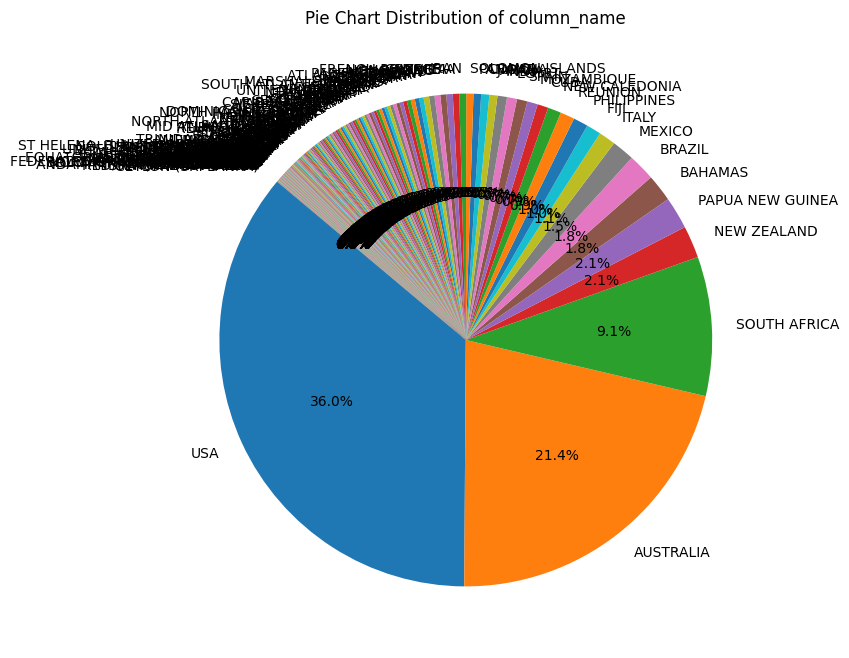

In [162]:
column_data = dataset['Country'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(column_data, labels=column_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Distribution of column_name')
plt.show()

In [163]:
# Data is very skewed, will remove rare occurences

In [164]:
dataset["Country"].value_counts()

Country
USA                       2308
AUSTRALIA                 1374
SOUTH AFRICA               585
NEW ZEALAND                135
PAPUA NEW GUINEA           135
                          ... 
MALDIVE ISLANDS              1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
BRITISH WEST INDIES          1
CEYLON (SRI LANKA)           1
Name: count, Length: 205, dtype: int64

In [165]:
country_counts = dataset['Country'].value_counts()
less_than_10 = country_counts[country_counts < 10]

In [166]:
print(f"Percentage of samples for countries with less than 10 samples: {less_than_10.sum() / len(dataset) * 100:.2f}%")

Percentage of samples for countries with less than 10 samples: 6.92%


In [167]:
dataset = dataset[~dataset['Country'].isin(less_than_10.index)]

In [168]:
dataset.shape

(6013, 8)

In [170]:
dataset.count()

Date           6012
Year           6010
Type           6010
Country        5962
Activity       5499
Name           5830
Injury         5987
Fatal (Y/N)    5510
dtype: int64

In [171]:
dataset["Date"]

index
0                05-Feb-2020
1       Reported 30-Jan-2020
2                17-Jan-2020
3                16-Jan-2020
4                13-Jan-2020
                ...         
6456             Before 1906
6457             Before 1903
6458             Before 1903
6459               1900-1905
6460               1883-1889
Name: Date, Length: 6013, dtype: object

In [174]:
dataset['Year']

index
0       2020.0
1       2020.0
2       2020.0
3       2020.0
4       2020.0
         ...  
6456       0.0
6457       0.0
6458       0.0
6459       0.0
6460       0.0
Name: Year, Length: 6013, dtype: float64

I want to aggregate the data per month, so the outliers that do not contain the months can be discarded since I can not make an educated inference on the month when it occured.

In [178]:
dataset = dataset.dropna(subset=['Date'])

In [181]:
pattern = r'([A-Za-z]{3}-\d{4})'

# Extract rows where the date_column matches the pattern
matching_rows = dataset[dataset['Date'].str.contains(pattern, regex=True)]


/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/3835995700.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matching_rows = dataset[dataset['Date'].str.contains(pattern, regex=True)]


In [ ]:
print(len(matching_rows))

5520


In [184]:
# Extract the matching pattern into a new column
dataset['extracted_date'] = dataset['Date'].str.extract(pattern)

/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/2969606184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['extracted_date'] = dataset['Date'].str.extract(pattern)


In [186]:
init = len(dataset)
dataset.dropna(subset=['extracted_date'], inplace=True)
print(f"Number of samples deleted: {init - len(dataset)}")

Number of samples deleted: 492


/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/3775187099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(subset=['extracted_date'], inplace=True)


In [187]:
dataset[['Month', 'Year']] = dataset['extracted_date'].str.split('-', expand=True)

/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/2148753751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[['Month', 'Year']] = dataset['extracted_date'].str.split('-', expand=True)


In [235]:
dataset['Month'].value_counts()

Month
Jul    553
Aug    477
Sep    443
Jan    425
Jun    402
Oct    389
Apr    362
Dec    348
Nov    337
Mar    337
Feb    332
May    303
uly      3
ept      2
mer      1
mid      1
Name: count, dtype: int64

In [ ]:
# Define the replacements as a dictionary
replacements = {
    'uly': 'Jul',
    'ept': 'Sep', 
}

# Replace the values in the 'Month' column
dataset['Month'] = dataset['Month'].replace(replacements)

/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/3117367895.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Month'] = dataset['Month'].replace(replacements)


In [237]:
dataset = dataset[~dataset['Month'].isin([['mer', 'mid']])]

In [191]:
dataset.drop(columns=['Date', 'extracted_date'], inplace=True)

/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/1153125343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=['Date', 'extracted_date'], inplace=True)


In [193]:
dataset.drop(columns=['Name'], inplace=True)

/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/2050605575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=['Name'], inplace=True)


In [ ]:
dataset.shape

(5520, 7)

In [200]:
dataset.count()

Year           5520
Type           5518
Country        5482
Activity       5108
Injury         5503
Fatal (Y/N)    5058
Month          5520
dtype: int64

Due to time constraints I'll just drop all missing values 

In [201]:
dataset.dropna(inplace=True)

/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/2639109627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


In [203]:
dataset["Activity"].value_counts()[:20]

Activity
Surfing            949
Swimming           731
Fishing            366
Spearfishing       279
Wading             137
Bathing            124
Standing            93
Snorkeling          81
Diving              80
Body boarding       62
Scuba diving        58
Body surfing        46
Kayaking            33
Boogie boarding     31
Treading water      28
Pearl diving        23
Free diving         23
Surf skiing         19
Fell overboard      19
Boogie Boarding     17
Name: count, dtype: int64

In [213]:
# Categories to be made: Swimming, Fishing, Diving, Surfing, Other
categories = {
    "Swimming": ["swim", "bath", "float", "wad", "play"],
    "Fishing": ["fish", "catch", "spear", "net", "crab"],
    "Diving": ["dive", "snorkel", "scuba", "free"],
}

def categorize_element(element, categories):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in element.lower():
                return category
    return "Other"

dataset['Activity_new'] = dataset['Activity'].apply(categorize_element, categories=categories)

/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/2657240860.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Activity_new'] = dataset['Activity'].apply(categorize_element, categories=categories)


In [205]:
dataset['Activity_new'].value_counts()

Activity_new
Other       2208
Swimming    1277
Fishing      988
Diving       242
Name: count, dtype: int64

In [211]:
dataset['Injury'].value_counts()[:30]

Injury
FATAL                          532
Foot bitten                     80
Leg bitten                      59
Left foot bitten                50
No injury                       49
Survived                        47
Right foot bitten               35
No injury, board bitten         31
Lacerations to foot             25
Hand bitten                     24
Foot lacerated                  20
Lacerations to left foot        20
Lacerations to right foot       20
Thigh bitten                    20
Right leg bitten                19
Arm bitten                      18
FATAL, body not recovered       18
Calf bitten                     17
No injury, surfboard bitten     16
Ankle bitten                    14
Minor injury                    13
Right thigh bitten              13
Left arm bitten                 12
Right calf bitten               12
Lacerations to right hand       12
Lacerations to right leg        11
Leg injured                     11
Heel bitten                     11
Left foot lac

In [214]:
injury_categories = {
    "Laceration": ["laceration", "cut", "bite", "tear", "wound"],
    "Fatal": ["death", "fatal"],
    "No injury": ["no injury", "unharmed", "uninjured", "no"],
}

dataset['Injuries_new'] = dataset['Injury'].apply(categorize_element, categories=injury_categories)

/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/713518007.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Injuries_new'] = dataset['Injury'].apply(categorize_element, categories=injury_categories)


In [215]:
dataset['Injuries_new'].value_counts()

Injuries_new
Other         1989
Laceration    1001
Fatal          898
No injury      827
Name: count, dtype: int64

In [216]:
dataset['Fatal (Y/N)'].value_counts()

Fatal (Y/N)
N          3726
Y           970
UNKNOWN      16
F             1
M             1
2017          1
Name: count, dtype: int64

In [218]:
mask_fatal_injuries = dataset['Injuries_new'] == 'Fatal'
mask_fatal_column = dataset['Fatal (Y/N)'] == 'Y'

In [221]:
overlap_mask = mask_fatal_injuries & mask_fatal_column
print(f"Number of samples where both columns agree: {overlap_mask.sum()}")

Number of samples where both columns agree: 894


This means that the fatal column does not add information

In [223]:
dataset.drop(columns=['Injury', 'Fatal (Y/N)'], inplace=True)

/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/2124778817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=['Injury', 'Fatal (Y/N)'], inplace=True)


In [224]:
dataset['Type'].value_counts()

Type
Unprovoked             3783
Provoked                486
Sea Disaster            157
Watercraft               88
Boating                  86
Boat                     81
Invalid                  23
Questionable              8
Unverified                1
Under investigation       1
Boatomg                   1
Name: count, dtype: int64

In [225]:
# If the attack is not provoked, I will considered it unprovoked
dataset['Type_new'] = dataset['Type'].apply(lambda x: x if x == 'Provoked' else 'Unprovoked')

/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/912262828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Type_new'] = dataset['Type'].apply(lambda x: x if x == 'Provoked' else 'Unprovoked')


In [ ]:
dataset.drop(columns=['Type'], inplace=True)

In [231]:
dataset.columns

Index(['Year', 'Country', 'Activity', 'Month', 'Activity_new', 'Injuries_new',
       'Type_new'],
      dtype='object')

In [ ]:
dataset['Month']

Month
Jul    553
Aug    477
Sep    443
Jan    425
Jun    402
Oct    389
Apr    362
Dec    348
Nov    337
Mar    337
Feb    332
May    303
uly      3
ept      2
mer      1
mid      1
Name: count, dtype: int64

Population Estimation

In [240]:
grouped = dataset.groupby(['Country', 'Activity_new', 'Month', "Year", 'Injuries_new', 'Type_new']).size().reset_index(name='count')

# Calculate the average number of samples per month by Country and Activity
average_samples = grouped.groupby(['Country', 'Month','Activity_new', 'Injuries_new', 'Type_new'])['count'].mean().reset_index(name='average_samples_per_month')

# Display the result
print(average_samples)

             Country Month Activity_new Injuries_new    Type_new  \
0     ATLANTIC OCEAN   Aug        Other        Fatal  Unprovoked   
1     ATLANTIC OCEAN   Dec        Other        Fatal  Unprovoked   
2     ATLANTIC OCEAN   Dec        Other    No injury  Unprovoked   
3     ATLANTIC OCEAN   Feb        Other    No injury  Unprovoked   
4     ATLANTIC OCEAN   Jan        Other        Fatal  Unprovoked   
...              ...   ...          ...          ...         ...   
1496         VIETNAM   Jul     Swimming        Other  Unprovoked   
1497         VIETNAM   Jun      Fishing        Other    Provoked   
1498         VIETNAM   Jun     Swimming   Laceration  Unprovoked   
1499         VIETNAM   May        Other   Laceration  Unprovoked   
1500         VIETNAM   May     Swimming   Laceration  Unprovoked   

      average_samples_per_month  
0                           1.0  
1                           1.0  
2                           1.0  
3                           1.0  
4            

If I am going to be interested in the probability of getting bitten if I go surfing in Australia for instance it would be very unlikley that I would be interested in seeing what the probability would be if I provoke or not 

In [241]:
grouped_only_activ = dataset.groupby(['Country', 'Activity_new', 'Month', "Year"]).size().reset_index(name='count')

# Calculate the average number of samples per month by Country and Activity
average_samples_only_activ = grouped.groupby(['Country', 'Month','Activity_new'])['count'].mean().reset_index(name='average_samples_per_month')

# Display the result
print(average_samples_only_activ)

            Country Month Activity_new  average_samples_per_month
0    ATLANTIC OCEAN   Aug        Other                       1.00
1    ATLANTIC OCEAN   Dec        Other                       1.00
2    ATLANTIC OCEAN   Feb        Other                       1.00
3    ATLANTIC OCEAN   Jan        Other                       1.25
4    ATLANTIC OCEAN   Jul        Other                       1.00
..              ...   ...          ...                        ...
757         VIETNAM   Jul     Swimming                       1.00
758         VIETNAM   Jun      Fishing                       1.00
759         VIETNAM   Jun     Swimming                       1.00
760         VIETNAM   May        Other                       1.00
761         VIETNAM   May     Swimming                       1.00

[762 rows x 4 columns]


In [244]:
average_samples_only_activ.head()

,Country,Month,Activity_new,average_samples_per_month
0,ATLANTIC OCEAN,Aug,Other,1.00
1,ATLANTIC OCEAN,Dec,Other,1.00
2,ATLANTIC OCEAN,Feb,Other,1.00
3,ATLANTIC OCEAN,Jan,Other,1.25
4,ATLANTIC OCEAN,Jul,Other,1.00


In [245]:
len(dataset[dataset["Country"]=="ATLANTIC OCEAN"])

14

In [263]:
llm = AzureChatOpenAI(
    api_version = "2024-08-01-preview",
    api_key = "1282f6f232ba42b3829792ee7b859267",
    azure_endpoint = "https://openpromptradu.openai.azure.com",
    temperature = 0.0,
    model_name = "gpt-4"
)


In [290]:
template_prompt = """Can you give me the number of people doing the following activity {activity} in the month of {month} in the following location {location}?
 If activity is Other, consider any type of nautical activity excluding swimming, diving or fishing.
Please output just the number, if no number is found, make a guess and please output just the number, no justification needed. Take in account the population of the country.
 Please do not separate the numbers and output them as a single number."""

In [ ]:
import pickle
exposure_metric = []

def run_llm_for_index(index_start, index_end):
    for index, row in average_samples_only_activ.iloc[index_start:index_end].iterrows():
        prompt = template_prompt.format(activity=row['Activity_new'], month=row['Month'], location=row['Country'])
        result = llm(prompt)
        
        number_of_people = int(result.content)
        exposure_metric.append(number_of_people)
        if index % 10 == 0 and index>0:
            print(f"Processed {index} samples")
            print(f"Number of people: {number_of_people} for activity {row['Activity_new']} in the month of {row['Month']} in the country {row['Country']}")
            with open(f"inter_openai/exposure_metric_{index}.pkl", "wb") as f:
                pickle.dump(exposure_metric[-10:], f)

Processed 430 samples
Number of people: 25 for activity Diving in the month of May in the country NEW CALEDONIA
Processed 440 samples
Number of people: 45 for activity Other in the month of Jan in the country NEW GUINEA
Processed 450 samples
Number of people: 50000 for activity Fishing in the month of Feb in the country NEW ZEALAND
Processed 460 samples
Number of people: 450 for activity Other in the month of Mar in the country NEW ZEALAND
Processed 470 samples
Number of people: 50000 for activity Fishing in the month of Sep in the country NEW ZEALAND
Processed 480 samples
Number of people: 450 for activity Other in the month of Sep in the country PACIFIC OCEAN
Processed 490 samples
Number of people: 15000 for activity Fishing in the month of May in the country PANAMA
Processed 500 samples
Number of people: 450 for activity Fishing in the month of Apr in the country PAPUA NEW GUINEA
Processed 510 samples
Number of people: 25 for activity Diving in the month of Jan in the country PAPUA 

In [296]:
combined_list = []
import os 

# Iterate over all files in the folder
for filename in sorted(os.listdir('inter_openai')):
    if filename.endswith('.pkl'):
        file_path = os.path.join('inter_openai', filename)
        # Load the contents of the pickle file
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
            # Append the contents to the combined list
            if len(data) != 10:
                print(f"Found a file with less than 10 elements: {filename}")
            combined_list.extend(data)


Found a file with less than 10 elements: exposure_metric_190.pkl


In [27]:
dataset_interpolation = dataset.interpolate(method='linear', limit_direction='both')

/var/folders/7m/q2yh5j193c5gf7sd2zd1g8pm0000gn/T/ipykernel_42804/161815399.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dataset_interpolation = dataset.interpolate(method='linear', limit_direction='both')


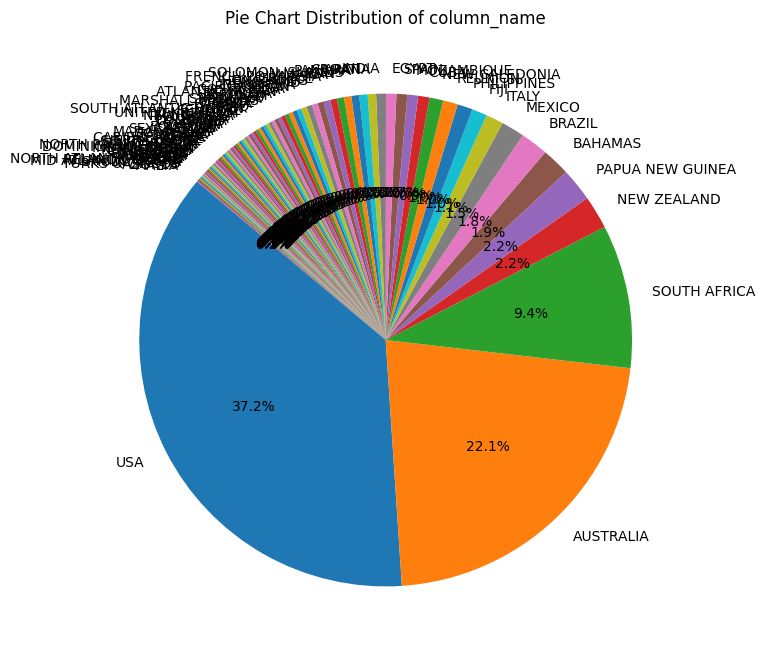

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'column_name' is the column you want to visualize


In [ ]:
country_counts = dataset['Country'].value_counts()
less_than_10 = country_counts[country_counts < 10]
dataset = dataset[~dataset['Country'].isin(less_than_5.index)]
print(len(less_than_10))

36


In [36]:
percentage = (less_than_5.sum() / len(dataset)) * 100

In [ ]:
dataset = dataset[~dataset['Country'].isin(less_than_5.index)] # Need to add here a mechanism to keep a count of all the dropped data

In [ ]:
dataset.count

(6262, 12)

In [63]:
dataset_top_95.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Injury,Fatal (Y/N),Investigator or Source
index,,,,,,,,,,,,
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,"No injury, but paddleboard bitten",N,"K. McMurray, TrackingSharks.com"
1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,PROVOKED INCIDENT Scratches to left wrist,N,"K. McMurray, TrackingSharks.com"
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,Laceration ot left ankle and foot,N,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,Minor injury to lower leg,N,"K. McMurray, TrackingSharks.com"
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,Lacerations to foot,N,"C. Creswell, GSAF"


In [62]:
dataset_top_95['Location'].value_counts()

Location
New Smyrna Beach, Volusia County                     181
Daytona Beach, Volusia County                         34
Cocoa Beach, Brevard County                           26
Ponce Inlet, Volusia County                           21
Melbourne Beach, Brevard County                       19
                                                    ... 
Gulfstream Park beach, Palm Beach County               1
Pet Den, Satellite Beach, Brevard County               1
Old Kona Airport State Park                            1
South side of Ponce de Leon Inlet, Volusia County      1
Panama Bay 8ºN, 79ºW                                   1
Name: count, Length: 3808, dtype: int64

In [65]:
len(dataset['Activity'].value_counts())

1452

In [ ]:
acitivity_counts = dataset['Activity'].value_counts()

# Calculate the cumulative percentage
cumulative_percentage = acitivity_counts.cumsum() / country_counts.sum() * 100

# Filter countries that constitute the top 95% of samples
top_95_activities = cumulative_percentage[cumulative_percentage <= 95].index

In [68]:
dataset_top_95_activities = dataset[dataset['Country'].isin(top_95_countries)]

In [69]:
dataset_top_95_activities['Activity'].value_counts()

Activity
Surfing                                                                                                  1005
Swimming                                                                                                  859
Fishing                                                                                                   413
Spearfishing                                                                                              327
Wading                                                                                                    151
                                                                                                         ... 
Free diving (but on surface)                                                                                1
Adrift after the sinking of the motor yacht Princess Dianne                                                 1
Free diving for abalone (submerged)                                                                         1
3

In [70]:
activity_counts = dataset['Activity'].value_counts()
less_than_10 = activity_counts[activity_counts < 10]
dataset_act = dataset[~dataset['Activity'].isin(activity_counts.index)]

In [78]:
dataset['Activity'].value_counts()[:30]

Activity
Surfing            1017
Swimming            906
Fishing             446
Spearfishing        339
Bathing             159
Wading              155
Diving              127
Standing            101
Snorkeling           97
Scuba diving         75
Body boarding        62
Body surfing         49
Kayaking             37
Boogie boarding      36
Pearl diving         31
Treading water       31
Free diving          30
Fell overboard       27
Surf skiing          20
Windsurfing          18
Walking              17
Boogie Boarding      17
Floating             17
Shark fishing        15
Rowing               14
Surf fishing         13
Canoeing             13
Surf-skiing          12
Kayak Fishing        11
Scuba Diving         10
Name: count, dtype: int64

In [ ]:
dataset[dataset['Activity'].str.contains('surf', case=False)]['Activity'].value_counts()    

In [79]:
dataset.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Injury', 'Fatal (Y/N)', 'Investigator or Source'],
      dtype='object')

In [80]:
dataset['Type'].value_counts()

Type
Unprovoked             4588
Provoked                582
Invalid                 523
Sea Disaster            216
Watercraft              137
Boat                    107
Boating                  91
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: count, dtype: int64

In [81]:
dataset['Injury'].value_counts()

Injury
FATAL                                                                                                    764
Survived                                                                                                  97
Foot bitten                                                                                               91
No injury                                                                                                 86
Leg bitten                                                                                                74
                                                                                                        ... 
Upper left arm lacerated                                                                                   1
Foot lacerated from toe to heel when he tripped on shark during fishing competition PROVOKED INCIDENT      1
Right lower leg & ankle lacerated                                                                          1
Puncture wou

In [ ]:
dataset['Fatal (Y/N)']